In [353]:
import pandas as pd
import numpy as np
import os
import os.path
from datetime import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Loading original data set 

FILE_PATH = os.path.abspath(os.path.dirname('data/cities_after_eda.csv'))
location_df = pd.read_csv(FILE_PATH + '/cities_after_eda.csv')

# Reorder columns
location_df = location_df[['City','State','Date time','Conditions' ,'Latitude','Longitude','Temperature (degF)',
                           'Minimum Temperature (degF)','Maximum Temperature (degF)','Relative Humidity (%)',
                           'Cloud Cover (%)','Precipitation (in)','Precipitation Cover (%)', 'Wind Direction', 
                           'Wind Speed (mph)','Snow Depth (in)', 'Snow (in)','Dew Point (degF)','Visibility (mi)']]
location_df.head(3)

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3


In [354]:
# # Convert strings to Date time
location_df['Date time'] = pd.to_datetime(location_df['Date time'], errors = 'coerce')

In [355]:
location_df.dtypes

City                                  object
State                                 object
Date time                     datetime64[ns]
Conditions                            object
Latitude                             float64
Longitude                            float64
Temperature (degF)                   float64
Minimum Temperature (degF)           float64
Maximum Temperature (degF)           float64
Relative Humidity (%)                float64
Cloud Cover (%)                      float64
Precipitation (in)                   float64
Precipitation Cover (%)              float64
Wind Direction                       float64
Wind Speed (mph)                     float64
Snow Depth (in)                      float64
Snow (in)                            float64
Dew Point (degF)                     float64
Visibility (mi)                      float64
dtype: object

In [356]:
# Check if we have null values and how many per column
location_df.isnull().sum()

City                          0
State                         0
Date time                     0
Conditions                    1
Latitude                      0
Longitude                     0
Temperature (degF)            1
Minimum Temperature (degF)    1
Maximum Temperature (degF)    1
Relative Humidity (%)         1
Cloud Cover (%)               1
Precipitation (in)            0
Precipitation Cover (%)       1
Wind Direction                1
Wind Speed (mph)              1
Snow Depth (in)               1
Snow (in)                     1
Dew Point (degF)              1
Visibility (mi)               1
dtype: int64

In [357]:
# Replace null value in Conditions column with the most common value
location_df['Conditions']= location_df[['Conditions']].apply(lambda x: x.fillna(x.value_counts().index[0]))
location_df['Conditions'].isnull().sum()

0

In [358]:
# Now Conditions feature has no Null values
location_df.isnull().sum()

City                          0
State                         0
Date time                     0
Conditions                    0
Latitude                      0
Longitude                     0
Temperature (degF)            1
Minimum Temperature (degF)    1
Maximum Temperature (degF)    1
Relative Humidity (%)         1
Cloud Cover (%)               1
Precipitation (in)            0
Precipitation Cover (%)       1
Wind Direction                1
Wind Speed (mph)              1
Snow Depth (in)               1
Snow (in)                     1
Dew Point (degF)              1
Visibility (mi)               1
dtype: int64

In [359]:
# Null value percentage
round(100*(location_df.isnull().sum()/len(location_df.index)), 2)

City                          0.0
State                         0.0
Date time                     0.0
Conditions                    0.0
Latitude                      0.0
Longitude                     0.0
Temperature (degF)            0.0
Minimum Temperature (degF)    0.0
Maximum Temperature (degF)    0.0
Relative Humidity (%)         0.0
Cloud Cover (%)               0.0
Precipitation (in)            0.0
Precipitation Cover (%)       0.0
Wind Direction                0.0
Wind Speed (mph)              0.0
Snow Depth (in)               0.0
Snow (in)                     0.0
Dew Point (degF)              0.0
Visibility (mi)               0.0
dtype: float64

In [360]:
# Print the columns that have missing values and make a list 
na_list = location_df.columns[location_df.isnull().any()].to_list()
na_list

['Temperature (degF)',
 'Minimum Temperature (degF)',
 'Maximum Temperature (degF)',
 'Relative Humidity (%)',
 'Cloud Cover (%)',
 'Precipitation Cover (%)',
 'Wind Direction',
 'Wind Speed (mph)',
 'Snow Depth (in)',
 'Snow (in)',
 'Dew Point (degF)',
 'Visibility (mi)']

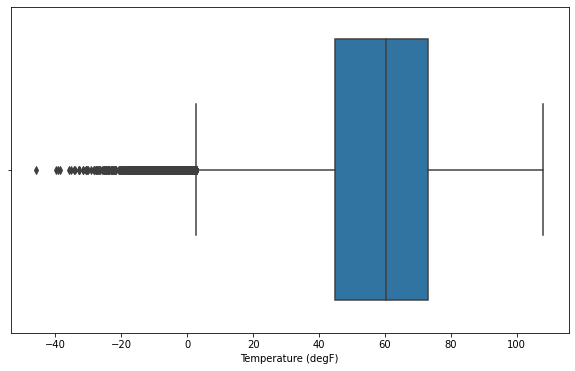

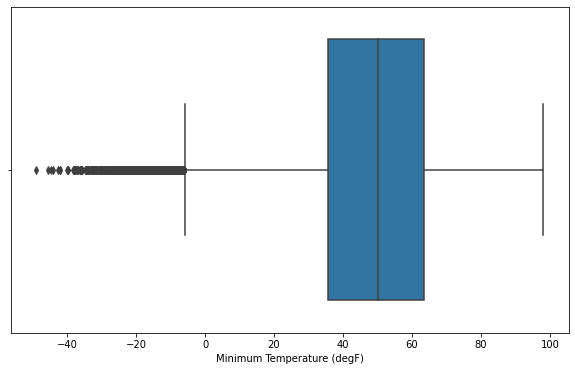

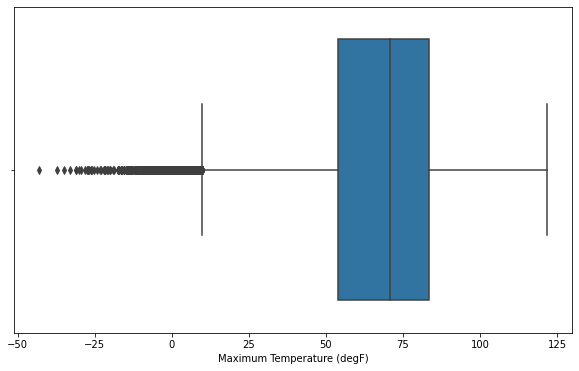

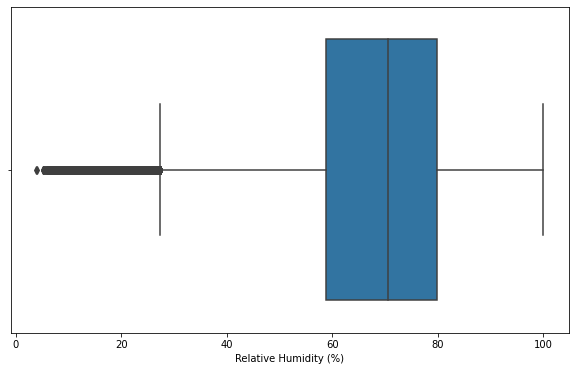

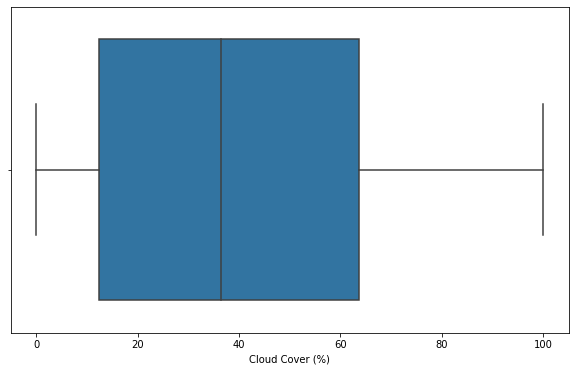

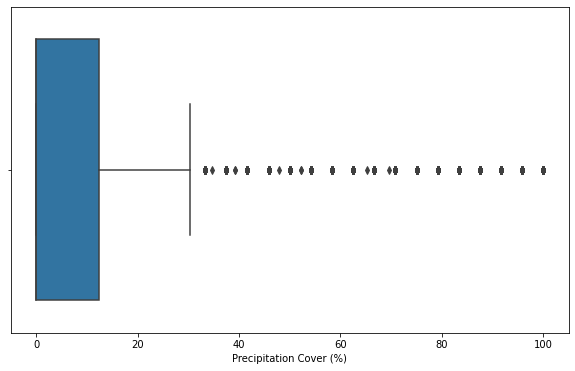

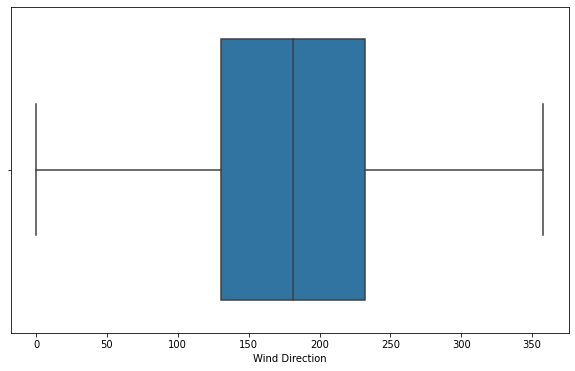

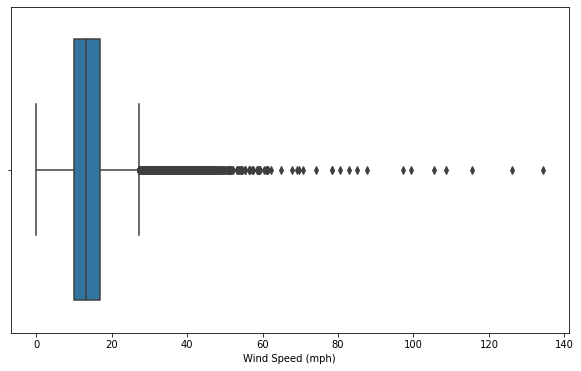

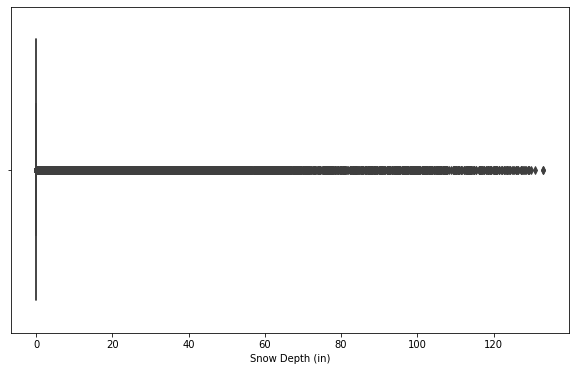

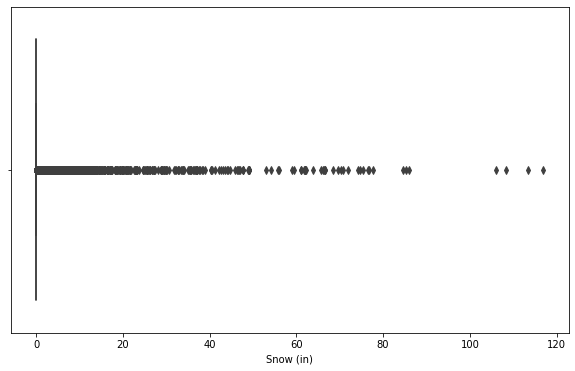

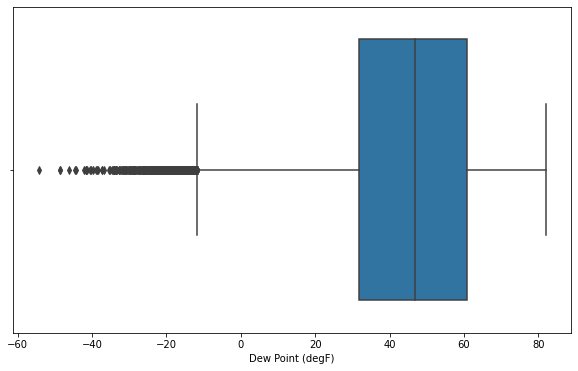

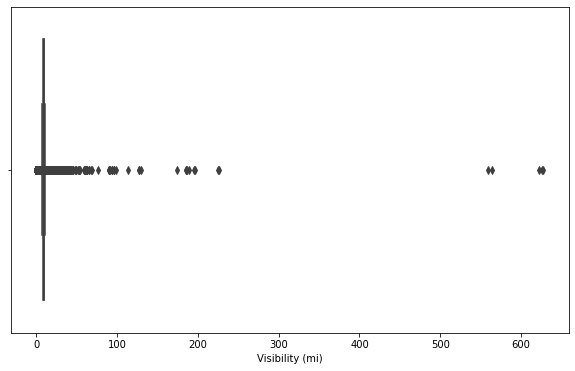

In [361]:
# Create boxplots of columns that have missing values to see if they have outliers
for column_x in na_list:
    fig, ax = plt.subplots(figsize = (10, 6))
    sns.boxplot(x = location_df[column_x])

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

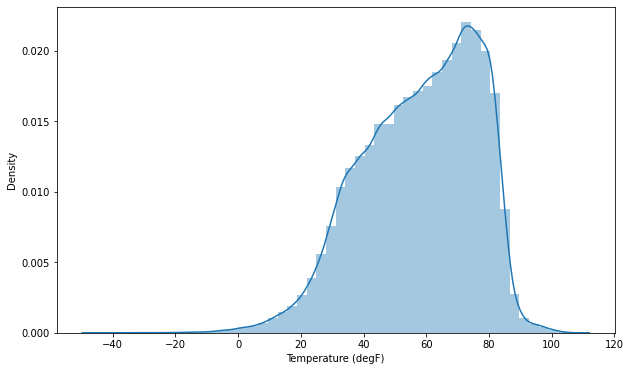

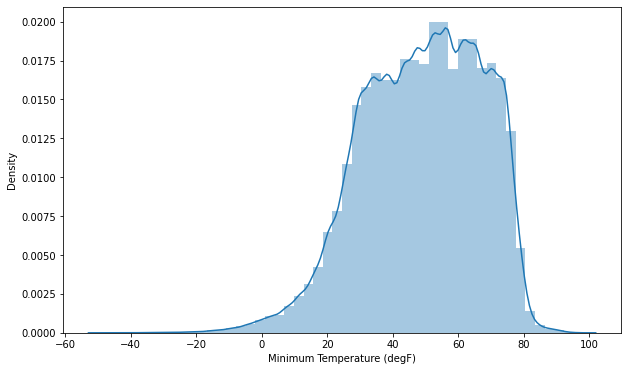

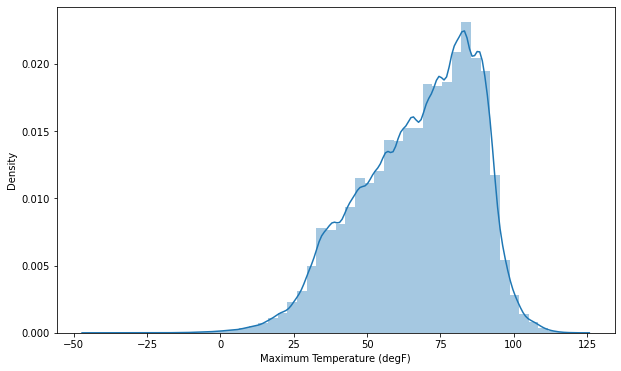

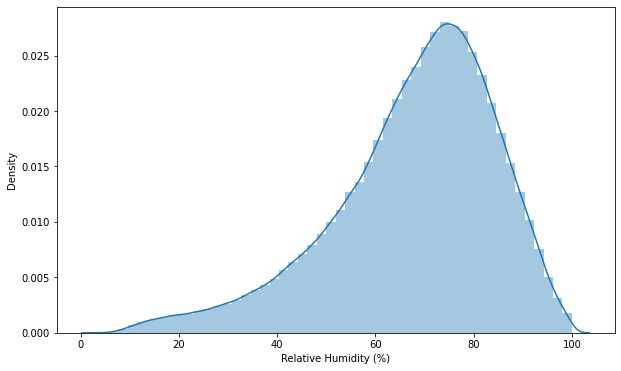

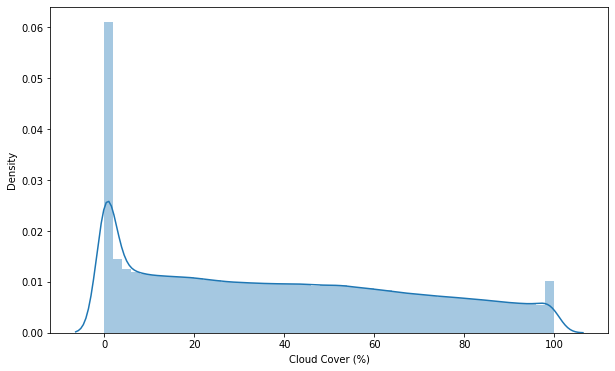

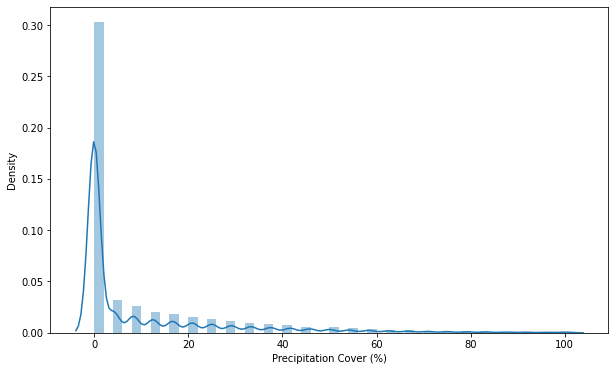

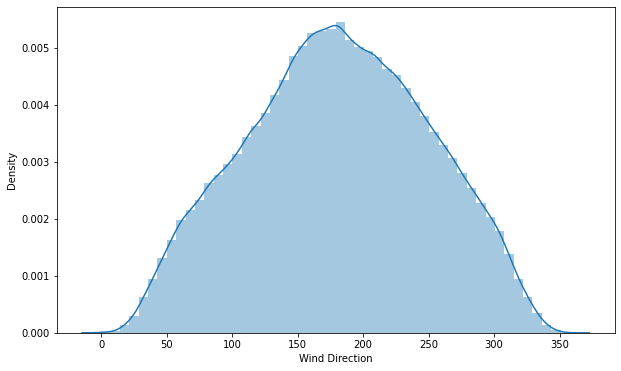

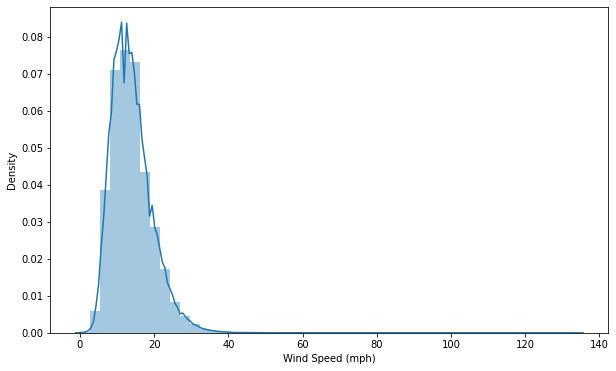

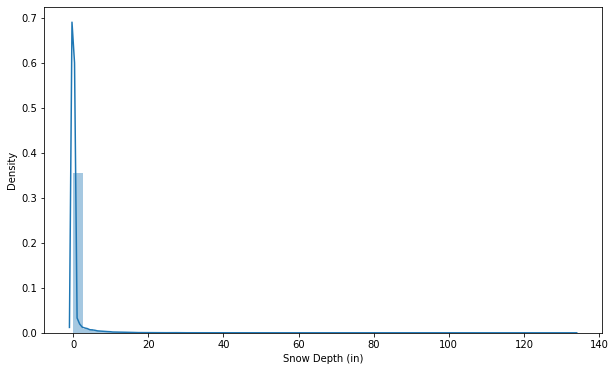

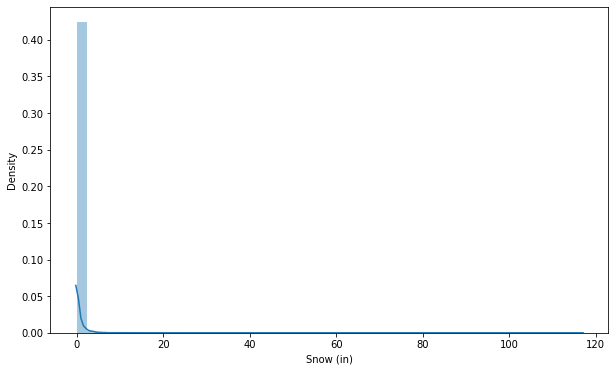

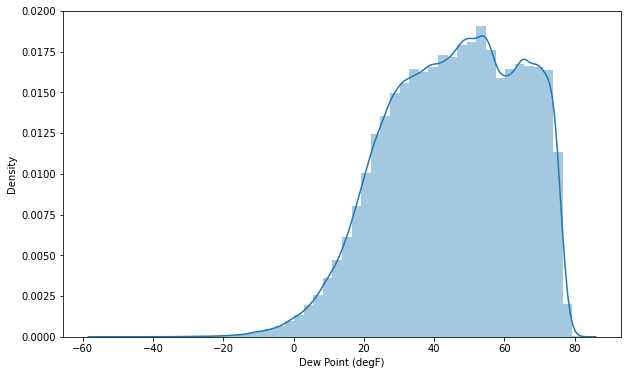

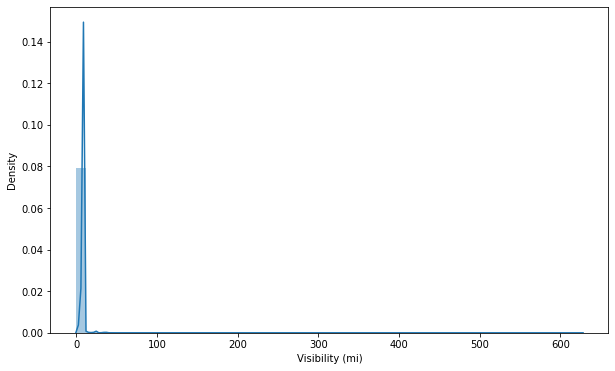

In [362]:
#Check for outliers using distribution plot for columns that have missing values
for column_x in na_list:
    fig, ax = plt.subplots(figsize = (10, 6))
    sns.distplot(location_df[column_x])

In [363]:
# Fill float type missing values with median values because most of the columns have outliers

float_columns = location_df.select_dtypes(include=['float64']).columns.tolist()

for column in location_df:
    if location_df[column].isnull().any():
        if(column in float_columns):
            location_df[column]=location_df[column].fillna(location_df[column].median())

In [364]:
# Check null values again after replacing them with modes
location_df.isnull().sum()

City                          0
State                         0
Date time                     0
Conditions                    0
Latitude                      0
Longitude                     0
Temperature (degF)            0
Minimum Temperature (degF)    0
Maximum Temperature (degF)    0
Relative Humidity (%)         0
Cloud Cover (%)               0
Precipitation (in)            0
Precipitation Cover (%)       0
Wind Direction                0
Wind Speed (mph)              0
Snow Depth (in)               0
Snow (in)                     0
Dew Point (degF)              0
Visibility (mi)               0
dtype: int64

In [365]:
location_df.dtypes

City                                  object
State                                 object
Date time                     datetime64[ns]
Conditions                            object
Latitude                             float64
Longitude                            float64
Temperature (degF)                   float64
Minimum Temperature (degF)           float64
Maximum Temperature (degF)           float64
Relative Humidity (%)                float64
Cloud Cover (%)                      float64
Precipitation (in)                   float64
Precipitation Cover (%)              float64
Wind Direction                       float64
Wind Speed (mph)                     float64
Snow Depth (in)                      float64
Snow (in)                            float64
Dew Point (degF)                     float64
Visibility (mi)                      float64
dtype: object

In [366]:
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6


In [367]:
# Describe numerical features
location_df.describe(exclude=['O'])

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Date time,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
count,560698,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000,560698.000000
unique,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-02-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-03-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,37.621192,-94.247102,58.067728,49.024800,67.662822,67.885244,39.700010,0.109232,10.104663,180.886972,13.925332,0.717415,0.084770,45.617073,9.295279
std,NaN,5.850423,16.927785,18.267214,18.072299,19.644054,16.716738,30.053036,0.352922,18.278802,69.135243,5.444722,4.659299,0.906782,18.571800,2.851304
min,NaN,21.304900,-157.858000,-45.900000,-49.000000,-43.000000,3.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-54.400000,0.000000
25%,NaN,33.693700,-108.564450,44.900000,35.800000,53.900000,58.800000,12.400000,0.000000,0.000000,130.750000,10.100000,0.000000,0.000000,31.800000,9.000000


In [368]:
# Describe catgorical features
location_df.describe(exclude='number')

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,City,State,Date time,Conditions
count,560698,560698,560698,560698
unique,348,49,1537,9
top,Springfield,CA,2020-02-04 00:00:00,Clear
freq,6144,61443,365,190806
first,NaN,NaN,2017-01-01 00:00:00,NaN
last,NaN,NaN,2021-03-17 00:00:00,NaN


In [369]:
location_df['Conditions'].value_counts()

Clear                     190806
Partially cloudy          136720
Rain, Partially cloudy     99373
Rain, Overcast             53281
Overcast                   23499
Rain                       21816
Snow, Partially cloudy     15829
Snow, Overcast             15013
Snow                        4361
Name: Conditions, dtype: int64

In [370]:
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560698 entries, 0 to 560697
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   City                        560698 non-null  object        
 1   State                       560698 non-null  object        
 2   Date time                   560698 non-null  datetime64[ns]
 3   Conditions                  560698 non-null  object        
 4   Latitude                    560698 non-null  float64       
 5   Longitude                   560698 non-null  float64       
 6   Temperature (degF)          560698 non-null  float64       
 7   Minimum Temperature (degF)  560698 non-null  float64       
 8   Maximum Temperature (degF)  560698 non-null  float64       
 9   Relative Humidity (%)       560698 non-null  float64       
 10  Cloud Cover (%)             560698 non-null  float64       
 11  Precipitation (in)          560698 non-

In [371]:
# Create separate columns for Month, Year and Day
location_df['Month'] = location_df["Date time"].dt.month
location_df['Year'] = location_df["Date time"].dt.year
location_df['Day'] = location_df["Date time"].dt.day

In [372]:
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5


In [373]:
import numpy as np
# Create Winter season column
cond = [(location_df['Month'] == 12), (location_df['Month'] == 1), (location_df['Month'] == 2)]

# create a list of the values we want to assign for each condition
values = ['December', 'January', 'February']

location_df['Winter'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January


In [374]:
location_df['Winter'].value_counts()

0           407398
January      56575
February     51465
December     45260
Name: Winter, dtype: int64

In [375]:
# Create Spring Season column 
cond = [(location_df['Month'] == 3), (location_df['Month'] == 4), (location_df['Month'] == 5)]

# create a list of the values we want to assign for each condition
values = ['March', 'April', 'May']

location_df['Spring'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0


In [376]:
# Create Summer season column 
cond = [(location_df['Month'] == 6), (location_df['Month'] == 7), (location_df['Month'] == 8)]

# create a list of the values we want to assign for each condition
values = ['June', 'July', 'August']

location_df['Summer'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0,0


In [377]:
# Create Summer season column 
cond = [(location_df['Month'] == 6), (location_df['Month'] == 7), (location_df['Month'] == 8)]

# create a list of the values we want to assign for each condition
values = ['June', 'July', 'August']

location_df['Summer'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0,0


In [378]:
# Create Fall season column 
cond = [(location_df['Month'] == 9), (location_df['Month'] == 10), (location_df['Month'] == 11)]

# create a list of the values we want to assign for each condition
values = ['September', 'October', 'November']

location_df['Fall'] = np.select(cond, values)
location_df.head()

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer,Fall
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0,0
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0,0
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0,0
3,Akron,OH,2019-01-04,Clear,41.0843,-81.5143,36.7,29.9,48.5,74.70,4.7,0.00,0.00,156.50,10.9,0.0,0.0,29.0,8.9,1,2019,4,January,0,0,0
4,Akron,OH,2019-01-05,Clear,41.0843,-81.5143,40.2,30.4,48.6,72.23,4.7,0.00,0.00,268.33,12.7,0.0,0.0,31.8,9.6,1,2019,5,January,0,0,0


In [379]:
# Display Locations that have cold and not cold winters 
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 500)
location_df['Cold_In_Winter_Cities'] = np.where(((location_df['Winter'] != 0) & ((location_df['Temperature (degF)']) <= 46.0)), 'In This City Winters Are Cold', 'In This City Winters Are Not Cold')

winter = location_df.groupby(['City', 'State'])['Cold_In_Winter_Cities']
winter.first()

City                State
Akron               OH           In This City Winters Are Cold
Albany              GA       In This City Winters Are Not Cold
                    NY           In This City Winters Are Cold
                    OR           In This City Winters Are Cold
Albuquerque         NM           In This City Winters Are Cold
Alexandria          LA       In This City Winters Are Not Cold
Allentown           PA       In This City Winters Are Not Cold
Altoona             PA           In This City Winters Are Cold
Amarillo            TX           In This City Winters Are Cold
Anacortes           WA           In This City Winters Are Cold
Anaheim             CA       In This City Winters Are Not Cold
Anchorage           AK           In This City Winters Are Cold
Anderson            IN           In This City Winters Are Cold
Ann Arbor           MI           In This City Winters Are Cold
Appleton            WI           In This City Winters Are Cold
Arlington           TX       

In [380]:
# Check the percentage of places where winters are cold and not cold 
cold = location_df['Cold_In_Winter_Cities'].value_counts(normalize=True)
cold

# 73% of cities have colder winters compared to the rest of the cities

In This City Winters Are Not Cold    0.732603
In This City Winters Are Cold        0.267397
Name: Cold_In_Winter_Cities, dtype: float64

In [381]:
location_df.head(3)

,City,State,Date time,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi),Month,Year,Day,Winter,Spring,Summer,Fall,Cold_In_Winter_Cities
0,Akron,OH,2019-01-01,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2,1,2019,1,January,0,0,0,In This City Winters Are Cold
1,Akron,OH,2019-01-02,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7,1,2019,2,January,0,0,0,In This City Winters Are Cold
2,Akron,OH,2019-01-03,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3,1,2019,3,January,0,0,0,In This City Winters Are Cold


In [382]:
# Create a new DF with locations and Cities have winter 
winter_df = location_df[['City', 'State', 'Cold_In_Winter_Cities']]
winter_df = winter_df.drop_duplicates(subset=['City', 'State'])

In [383]:
winter_df.head()

,City,State,Cold_In_Winter_Cities
0,Akron,OH,In This City Winters Are Cold
807,Albany,GA,In This City Winters Are Not Cold
1614,Albany,NY,In This City Winters Are Cold
2421,Albany,OR,In This City Winters Are Cold
3228,Albuquerque,NM,In This City Winters Are Cold


In [384]:
# Create a directory, where we want to store the csv file  
winter_df.to_csv(r'C:\Users\Khisl\Desktop\LABSPT_17\PT17_cityspire-f-ds\weather_api\data\data\winter_cold.csv', index = False)

In [385]:
# Create a list of all years and months
month_list = (location_df['Month'].unique()).tolist()

In [386]:
# Create a list of all locations 
city = (location_df['City'].unique()).tolist()
state = (location_df['State'].unique()).tolist()

In [387]:
# Created a new dataframe to calculate average temperature per month per city  

cities_per_month = location_df.filter(['City', 'State', 'Temperature (degF)', 'Minimum Temperature (degF)', 'Maximum Temperature (degF)', 'Date time', 'Month'], axis=1)
cities_per_month

,City,State,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Date time,Month
0,Akron,OH,41.3,35.7,60.8,2019-01-01,1
1,Akron,OH,37.3,34.0,41.7,2019-01-02,1
2,Akron,OH,33.1,29.9,36.8,2019-01-03,1
3,Akron,OH,36.7,29.9,48.5,2019-01-04,1
4,Akron,OH,40.2,30.4,48.6,2019-01-05,1
...,...,...,...,...,...,...,...
560693,Yuma,AZ,53.1,41.0,65.0,2018-12-27,12
560694,Yuma,AZ,52.5,44.1,57.8,2018-12-28,12
560695,Yuma,AZ,49.5,43.1,56.9,2018-12-29,12
560696,Yuma,AZ,48.9,39.8,60.2,2018-12-30,12


In [388]:
# Average temperature per city per month
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 10000)
grouped = cities_per_month.groupby(['City', 'State','Month'])
avg_temp_df = grouped.mean().reset_index()
avg_temp_df = avg_temp_df.rename(columns={"Temperature (degF)": "Avg_Temp (degF)", "Minimum Temperature (degF)": "Avg_Min_Temp (degF)", "Maximum Temperature (degF)": "Avg_Max_Temp (degF)"})
avg_temp_df.head(3)

,City,State,Month,Avg_Temp (degF),Avg_Min_Temp (degF),Avg_Max_Temp (degF)
0,Akron,OH,1,31.172258,25.014839,37.494194
1,Akron,OH,2,34.370922,26.408511,41.643972
2,Akron,OH,3,39.612057,30.921986,47.899291


In [389]:
# Create a directory, where we want to store the csv file  
avg_temp_df.to_csv(r'C:\Users\Khisl\Desktop\LABSPT_17\PT17_cityspire-f-ds\weather_api\data\data\average_temp.csv', index = False)

In [390]:
(avg_temp_df.loc[(avg_temp_df['City']=='Akron')& (avg_temp_df['State']=='OH') & (avg_temp_df['Month'] == 2)]).to_json()

'{"City":{"1":"Akron"},"State":{"1":"OH"},"Month":{"1":2},"Avg_Temp (degF)":{"1":34.3709219858},"Avg_Min_Temp (degF)":{"1":26.4085106383},"Avg_Max_Temp (degF)":{"1":41.6439716312}}'

In [391]:
# Create a function that takes a location and month as an input and outputs average temperature 
def temperature_per_month(city, state, month):
    avg = (avg_temp_df.loc[(avg_temp_df['City']==city) & (avg_temp_df['State']==state) & (avg_temp_df['Month'] == month)]).to_json()
    return avg

In [392]:
# TEST INPUT LOCATION AND OUTPUT THE AVERAGE TEMPERATURE PER MONTH 
print(temperature_per_month('Yuma', 'AZ', 2))    

{"City":{"4369":"Yuma"},"State":{"4369":"AZ"},"Month":{"4369":2},"Avg_Temp (degF)":{"4369":60.465248227},"Avg_Min_Temp (degF)":{"4369":50.1567375887},"Avg_Max_Temp (degF)":{"4369":71.5241134752}}


In [393]:
# Test input location and output the average temperature per month 
print(temperature_per_month('San Francisco', 'CA', 12))    

{"City":{"3455":"San Francisco"},"State":{"3455":"CA"},"Month":{"3455":12},"Avg_Temp (degF)":{"3455":52.3491935484},"Avg_Min_Temp (degF)":{"3455":46.0725806452},"Avg_Max_Temp (degF)":{"3455":59.125}}


In [394]:
# Create a function that takes a location and outputs whether   
def winters_cold(city, state):
    winter = (winter_df.loc[(winter_df['City']==city) & (winter_df['State']==state)]).to_json()
    return winter

In [395]:
# TEST INPUT LOCATION AND OUTPUT WHETHER WINTER IS COLD 
print(winters_cold('San Diego', 'CA'))    

{"City":{"230570":"San Diego"},"State":{"230570":"CA"},"Cold_In_Winter_Cities":{"230570":"In This City Winters Are Not Cold"}}


In [396]:
print(winters_cold('Tampa', 'FL'))  

{"City":{"259588":"Tampa"},"State":{"259588":"FL"},"Cold_In_Winter_Cities":{"259588":"In This City Winters Are Not Cold"}}


In [397]:
print(winters_cold('Albany', 'NY'))  

{"City":{"1614":"Albany"},"State":{"1614":"NY"},"Cold_In_Winter_Cities":{"1614":"In This City Winters Are Cold"}}


In [398]:
import sklearn
from sklearn.model_selection import train_test_split
import category_encoders as ce 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from scipy.stats import randint
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [399]:
# Prepare Dataframe for predictions
location_df = location_df[['City','State','Month', 'Day','Conditions' ,'Latitude','Longitude','Temperature (degF)',
                           'Minimum Temperature (degF)','Maximum Temperature (degF)','Relative Humidity (%)',
                           'Cloud Cover (%)','Precipitation (in)','Precipitation Cover (%)', 'Wind Direction', 
                           'Wind Speed (mph)','Snow Depth (in)', 'Snow (in)','Dew Point (degF)','Visibility (mi)']]
location_df.head(3)

,City,State,Month,Day,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
0,Akron,OH,1,1,"Rain, Overcast",41.0843,-81.5143,41.3,35.7,60.8,78.77,93.4,0.27,8.33,235.13,29.5,0.0,0.0,35.1,9.2
1,Akron,OH,1,2,Overcast,41.0843,-81.5143,37.3,34.0,41.7,84.43,97.5,0.00,0.00,168.96,13.1,0.0,0.0,32.9,6.7
2,Akron,OH,1,3,Partially cloudy,41.0843,-81.5143,33.1,29.9,36.8,76.35,69.1,0.00,4.17,258.58,17.6,0.0,0.0,26.4,9.3


In [400]:
location_df.dtypes

City                           object
State                          object
Month                           int64
Day                             int64
Conditions                     object
Latitude                      float64
Longitude                     float64
Temperature (degF)            float64
Minimum Temperature (degF)    float64
Maximum Temperature (degF)    float64
Relative Humidity (%)         float64
Cloud Cover (%)               float64
Precipitation (in)            float64
Precipitation Cover (%)       float64
Wind Direction                float64
Wind Speed (mph)              float64
Snow Depth (in)               float64
Snow (in)                     float64
Dew Point (degF)              float64
Visibility (mi)               float64
dtype: object

In [401]:
loc = (location_df.groupby(['City', 'State'], as_index=False))

In [402]:
# Create a directory, where we want to store the csv file  
location_df.to_csv(r'C:\Users\Khisl\Desktop\LABSPT_17\PT17_cityspire-f-ds\weather_api\data\data\location.csv', index = False)

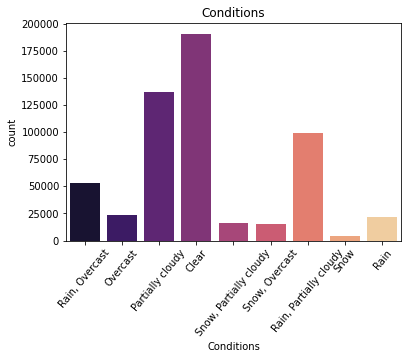

In [403]:
conditions = sns.countplot(x = 'Conditions', data = location_df, palette = 'magma')
conditions.set_xticklabels(conditions.get_xticklabels(), rotation=50)
plt.title('Conditions')
plt.show()

In [404]:
# Encode the Conditions column

ord_enc = OrdinalEncoder()
location_df['Conditions'] = ord_enc.fit_transform(location_df['Conditions'].values.reshape(-1, 1))
location_df['Conditions'].value_counts()

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0.0    190806
2.0    136720
5.0     99373
4.0     53281
1.0     23499
3.0     21816
8.0     15829
7.0     15013
6.0      4361
Name: Conditions, dtype: int64

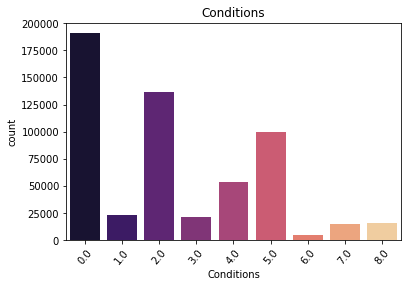

In [405]:
conditions = sns.countplot(x = 'Conditions', data = location_df, palette = 'magma')
conditions.set_xticklabels(conditions.get_xticklabels(), rotation=50)
plt.title('Conditions')
plt.show()

In [406]:
import pickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier

# Create a baseline model
clf_dummy = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy = 'median'),
    StandardScaler(),
    DummyClassifier(strategy='most_frequent', random_state=42)
)


clf = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy = 'median'),
    StandardScaler(),
    RandomForestClassifier(n_estimators=200,n_jobs=-1, random_state=42)
)

In [407]:
# Split data into Training and Testing for each location
training = location_df.groupby(['City', 'State'], as_index=False).apply(lambda x: x.sample(frac=0.8))
training.head()

City State  Month  Day  Conditions  Latitude  Longitude  \
0 294699  Akron    OH      3   28         4.0  41.08431  -81.51431   
  294907  Akron    OH     10   22         5.0  41.08431  -81.51431   
  32      Akron    OH      2    2         0.0  41.08430  -81.51430   
  294650  Akron    OH      2    7         7.0  41.08431  -81.51431   
  294521  Akron    OH     10    1         0.0  41.08431  -81.51431   

          Temperature (degF)  Minimum Temperature (degF)  \
0 294699                49.3                        44.9   
  294907                45.2                        33.8   
  32                    25.3                        10.0   
  294650                22.6                        18.4   
  294521                54.6                        38.8   

          Maximum Temperature (degF)  Relative Humidity (%)  Cloud Cover (%)  \
0 294699                        52.8                  90.65             98.4   
  294907                        59.5                  64.80             38.3   
  32                            36.8                  77.59             19.6   
  294650                        26.0                  77.35             83.6   
  294521                        70.9                  59.91              3.2   

          Precipitation (in)  Precipitation Cover (%)  Wind Direction  \
0 294699                0.02                    45.83          117.04   
  294907                0.01                    12.50          222.88   
  32                    0.00                     4.17          195.00   
  294650                0.14                    29.17          212.38   
  294521                0.00                     0.00           80.54   

          Wind Speed (mph)  Snow Depth (in)  Snow (in)  Dew Point (degF)  \
0 294699               9.8             0.00       0.00              46.7   
  294907              14.6             0.00       0.00              33.3   
  32                  13.6             4.32       0.00              19.2   
  294650              15.4             5.52       1.11              16.5   
  294521               8.8             0.00       0.00              39.0   

          Visibility (mi)  
0 294699              5.8  
  294907              9.9  
  32                  8.4  
  294650              6.2  
  294521              9.9

In [408]:
training.shape

(448643, 20)

In [409]:
testing = location_df.loc[set(location_df.index) - set(training.index.get_level_values(1))]
testing.head()

,City,State,Month,Day,Conditions,Latitude,Longitude,Temperature (degF),Minimum Temperature (degF),Maximum Temperature (degF),Relative Humidity (%),Cloud Cover (%),Precipitation (in),Precipitation Cover (%),Wind Direction,Wind Speed (mph),Snow Depth (in),Snow (in),Dew Point (degF),Visibility (mi)
262146,Thousand Oaks,CA,5,21,2.0,34.1757,-118.8480,59.3,52.4,66.9,70.61,31.4,0.00,0.00,246.46,29.8,0.00,0.00,49.2,9.8
5,Akron,OH,1,6,2.0,41.0843,-81.5143,38.3,30.9,42.7,66.91,47.7,0.00,0.00,230.75,12.2,0.00,0.00,28.1,9.9
6,Akron,OH,1,7,2.0,41.0843,-81.5143,41.0,32.7,54.9,58.02,60.3,0.00,16.67,142.42,17.1,0.00,0.00,27.1,9.9
524294,Stamford,CT,4,7,5.0,41.0519,-73.5422,44.7,38.9,48.6,63.47,59.0,0.01,4.17,256.21,23.0,0.00,0.00,32.9,9.9
9,Akron,OH,1,10,7.0,41.0843,-81.5143,23.3,21.5,24.8,73.04,87.3,0.01,33.33,299.92,14.3,2.74,1.01,15.9,6.8


In [410]:
testing.shape

(112055, 20)

In [411]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    X.drop_duplicates(inplace=False)
    # Prevent SettingWithCopyWarning
    X = X.copy()
    return X

train = wrangle(training)
test = wrangle(testing)

In [412]:
# Describe categorical variables  
train.describe(exclude='number')

,City,State
count,448643,448643
unique,348,49
top,Springfield,CA
freq,4916,49163


In [413]:
#The Conditions column is the target 
target = 'Conditions'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

#Get a list of numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

#Get a series with the cardinality of the nonnumeric features 
cardinality = train_features.select_dtypes(exclude='number').nunique()

#Get a list of all categorical features with cardinality <=500
categorical_features = cardinality[cardinality<=500].index.tolist()

#Combine all the lists
features = numeric_features + categorical_features

In [414]:
features

['Month',
 'Day',
 'Latitude',
 'Longitude',
 'Temperature (degF)',
 'Minimum Temperature (degF)',
 'Maximum Temperature (degF)',
 'Relative Humidity (%)',
 'Cloud Cover (%)',
 'Precipitation (in)',
 'Precipitation Cover (%)',
 'Wind Direction',
 'Wind Speed (mph)',
 'Snow Depth (in)',
 'Snow (in)',
 'Dew Point (degF)',
 'Visibility (mi)',
 'City',
 'State']

In [415]:
# Baseline model 
### Fit the model
for location in train_grouped.groups:
    training_group = train_grouped.get_group(location) 
    X_train = training_group[features]
    y_train = training_group[target]
    testing_group = test_grouped.get_group(location)
    X_test = testing_group[features]
    y_test = testing_group[target]

    clf_dummy.fit(X_train, y_train)
    ### Make predictions on a Test data
    test_predict_dummy = clf_dummy.predict(X_test)
    score_test_dummy = clf_dummy.score(X_test, y_test)

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

In [416]:
import joblib 

train_grouped = train.groupby(['City', 'State'])
test_grouped = test.groupby(['City', 'State'])
predicted_test = pd.DataFrame()

for location in train_grouped.groups:
    training_group = train_grouped.get_group(location) 
    X_train = training_group[features]
    y_train = training_group[target]
    testing_group = test_grouped.get_group(location)
    X_test = testing_group[features]
    y_test = testing_group[target]
    ### Fit the Classification model
    clf.fit(X_train, y_train)
    ### Make predictions on a Test data
    test_data_predict = clf.predict(X_test)
    score_test = clf.score(X_test, y_test)
    # Create a column with predicted conditions
    test_new = pd.DataFrame(data=test_data_predict, index=X_test.index, columns=['Predicted_Condition'])
    test1 = pd.merge(X_test, test_new, left_index=True, right_index=True)
    predicted_test = pd.concat([predicted_test, test1])
    joblib.dump(clf, 'conditions_predictor.pkl')

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
c:\users\khisl\.virtualenvs\pt17_cityspire-f-ds-uxny13fo\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

In [417]:
print("Baseline score: ", score_test_dummy.mean())
print(test_predict_dummy)

Baseline score:  0.8273615635179153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [418]:
print("Accuracy Score: ", score_test.mean())

Accuracy Score:  0.996742671009772


In [419]:
predicted_test['City'].value_counts()

Springfield           1228
Albany                 921
Rochester              614
Conway                 614
Lewiston               614
Lafayette              614
Longview               614
Jackson                614
Columbus               614
Warren                 614
Greenville             614
Columbia               614
Portland               614
Fayetteville           614
Atlantic City          307
Ithaca                 307
New Orleans            307
Spartanburg            307
Wyoming                307
Sheboygan              307
Trenton                307
Las Vegas              307
Grand Junction         307
Hartford               307
Denver                 307
Visalia                307
Lancaster              307
Seattle                307
Owensboro              307
Aurora                 307
Fort Collins           307
Boulder                307
Orlando                307
Colorado Springs       307
Appleton               307
Washington             307
Temple                 307
B

In [420]:
clf = joblib.load('conditions_predictor.pkl')

In [421]:
score_test = clf.score(X_test, y_test)
print(score_test.mean())

0.996742671009772


In [422]:
test_df = predicted_test.filter(['City', 'State', 'Month', 'Day', 'Predicted_Condition'], axis=1)
test_df

,City,State,Month,Day,Predicted_Condition
5,Akron,OH,1,6,2.0
6,Akron,OH,1,7,2.0
9,Akron,OH,1,10,7.0
10,Akron,OH,1,11,8.0
14,Akron,OH,1,15,1.0
...,...,...,...,...,...
560662,Yuma,AZ,11,26,0.0
560687,Yuma,AZ,12,21,2.0
560696,Yuma,AZ,12,30,0.0
560697,Yuma,AZ,12,31,2.0


In [423]:
test_df['Predicted_Condition'] = test_df['Predicted_Condition'].replace({0.0: 'Rain, Overcast', 1.0: 'Overcast', 2.0: 'Partially cloudy', 
                                        3.0: 'Clear', 4.0: 'Snow, Partially cloudy', 5.0: 'Snow, Overcast', 
                                        6.0: 'Rain, Partially cloudy', 7.0: 'Snow', 8.0: 'Rain'})

test_df

,City,State,Month,Day,Predicted_Condition
5,Akron,OH,1,6,Partially cloudy
6,Akron,OH,1,7,Partially cloudy
9,Akron,OH,1,10,Snow
10,Akron,OH,1,11,Rain
14,Akron,OH,1,15,Overcast
...,...,...,...,...,...
560662,Yuma,AZ,11,26,"Rain, Overcast"
560687,Yuma,AZ,12,21,Partially cloudy
560696,Yuma,AZ,12,30,"Rain, Overcast"
560697,Yuma,AZ,12,31,Partially cloudy


In [424]:
# Create a function that takes a location, month, and day as an input and outputs a condition
def predict_condition(city, state, month, day):
    cond = (test_df.loc[(test_df['City']==city) & (test_df['State']==state) & (test_df['Month'] == month) & 
                        (test_df['Day'] == day)].to_json())
    return cond

In [425]:
#TEST INPUT LOCATION, MONTH, AND DAY AND OUTPUT PREDICTED CONDITION
print(predict_condition('Yuma', 'AZ', 12, 8))    

{"City":{},"State":{},"Month":{},"Day":{},"Predicted_Condition":{}}


In [426]:
#TEST INPUT LOCATION, MONTH, AND DAY AND OUTPUT PREDICTED CONDITION
print(predict_condition('San Francisco', 'CA', 1, 15))    

{"City":{"232121":"San Francisco"},"State":{"232121":"CA"},"Month":{"232121":1},"Day":{"232121":15},"Predicted_Condition":{"232121":"Partially cloudy"}}


In [427]:
#TEST INPUT LOCATION, MONTH, AND DAY AND OUTPUT PREDICTED CONDITION
print(predict_condition('Akron', 'OH', 1, 17))   

{"City":{"294264":"Akron","294629":"Akron"},"State":{"294264":"OH","294629":"OH"},"Month":{"294264":1,"294629":1},"Day":{"294264":17,"294629":17},"Predicted_Condition":{"294264":"Snow, Partially cloudy","294629":"Partially cloudy"}}


In [428]:
print(f'X_train shape before ordinal encoding: {X_train.shape}')

encoder = clf.named_steps['ordinalencoder']
X_train_enc = encoder.transform(X_train)
print(f'X_train shape after ordinal encoding: {X_train_enc.shape}')
#the same because ordinal encoding does not increase dimensionality of the data

X_train shape before ordinal encoding: (1230, 19)
X_train shape after ordinal encoding: (1230, 19)


In [429]:
rf = clf.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train_enc.columns)
importances[-20:] #top 20 important features

Month                         0.011147
Day                           0.011882
Latitude                      0.001668
Longitude                     0.001619
Temperature (degF)            0.015709
Minimum Temperature (degF)    0.017566
Maximum Temperature (degF)    0.023353
Relative Humidity (%)         0.052313
Cloud Cover (%)               0.617246
Precipitation (in)            0.089696
Precipitation Cover (%)       0.063610
Wind Direction                0.015633
Wind Speed (mph)              0.015462
Snow Depth (in)               0.000000
Snow (in)                     0.000000
Dew Point (degF)              0.024553
Visibility (mi)               0.038542
City                          0.000000
State                         0.000000
dtype: float64

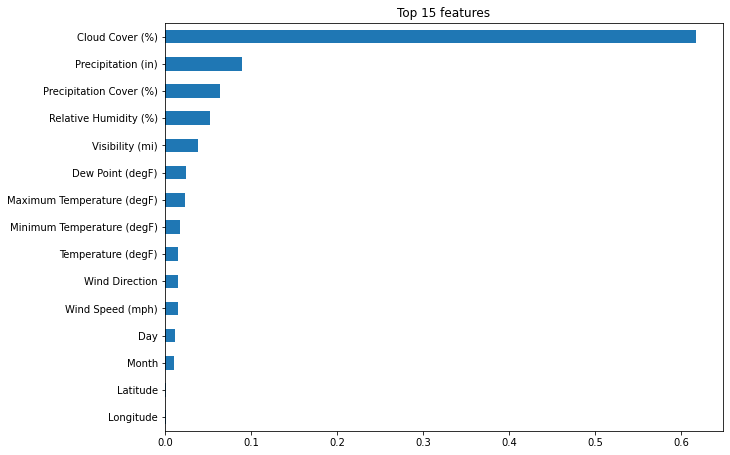

In [430]:
n=15
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [431]:
test_pred = clf.predict(X_test)
test_pred

array([0., 0., 2., 0., 2., 2., 0., 0., 0., 0., 0., 0., 5., 2., 2., 0., 2.,
       2., 0., 0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 0., 2., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 2., 0., 2., 0., 0., 5., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 4., 0., 0., 2., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 5., 0., 2., 2., 2., 0., 0.,
       5., 0., 0., 2., 0., 0., 2., 2., 0., 0., 0., 0., 0., 2., 0., 2., 0.,
       0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [432]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# summarize the fit of the model
print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       253
         2.0       1.00      0.98      0.99        47
         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         6

    accuracy                           1.00       307
   macro avg       1.00      0.99      1.00       307
weighted avg       1.00      1.00      1.00       307

[[253   0   0   0]
 [  1  46   0   0]
 [  0   0   1   0]
 [  0   0   0   6]]
